Выбираем вариант практической работы при помощи генератора случайных чисел

In [2]:
from random import randint

randint(1, 12)

12

Задаем постоянные величины для расчета показателей проекта

In [3]:
duration = 4 # срок проекта
tax_rate = 0.4 # ставка налога
amortization = 30_000 # амортизация
initial_investment = 500_000 # начальные инвестиции

Сгенерируем список из сотни значений для характеристики "Объем выпуска, тыс. шт.", распределенной по нормальному закону. Для воспроизводимости результатов эксперимента зафиксируем зерно псевдослучайного генератора

In [4]:
import numpy as np

np.random.seed(42)

mean = 6500
std_dev = 370
num_samples = 10000

values = np.random.normal(mean, std_dev, num_samples)
values

array([6683.78423661, 6448.84220857, 6739.6447591 , ..., 6239.03281215,
       6683.43326202, 6738.42372781])

Визуализируем распределение величины

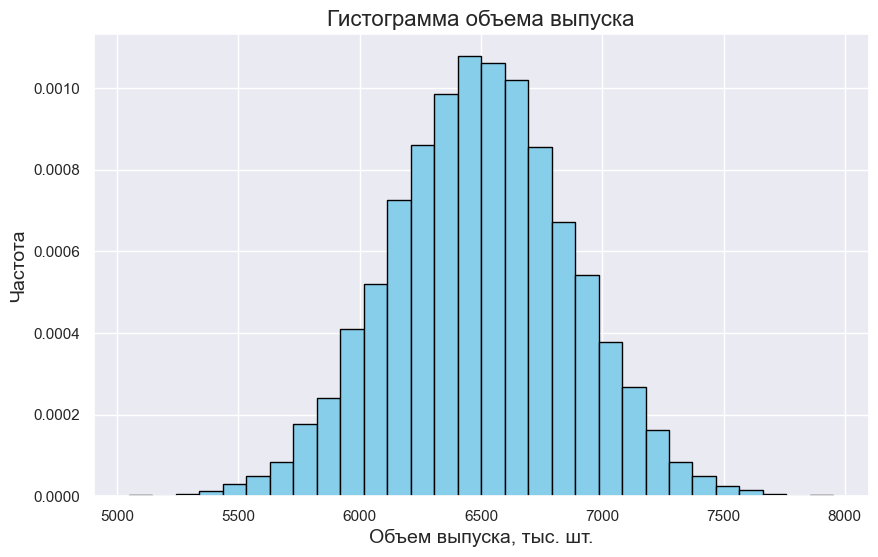

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(10, 6))  
plt.hist(values, bins=30, density=True, color='skyblue', edgecolor='black')  
plt.xlabel('Объем выпуска, тыс. шт.', fontsize=14) 
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма объема выпуска', fontsize=16) 
plt.grid(True)
plt.show()

Аналогично сгенерируем величину постоянных затрат и норму дисконта, имеющих равномерный закон распределения.

In [6]:
import numpy as np

np.random.seed(42) 

# Постоянные затраты, руб.
low_cost = 40000
high_cost = 90000

costs = np.random.uniform(low_cost, high_cost, num_samples)

# Норма дисконта, %
low_discount = 0.08
high_discount = 0.14

discounts = np.random.uniform(low_discount, high_discount, num_samples)

Также построим графики распределения величин:

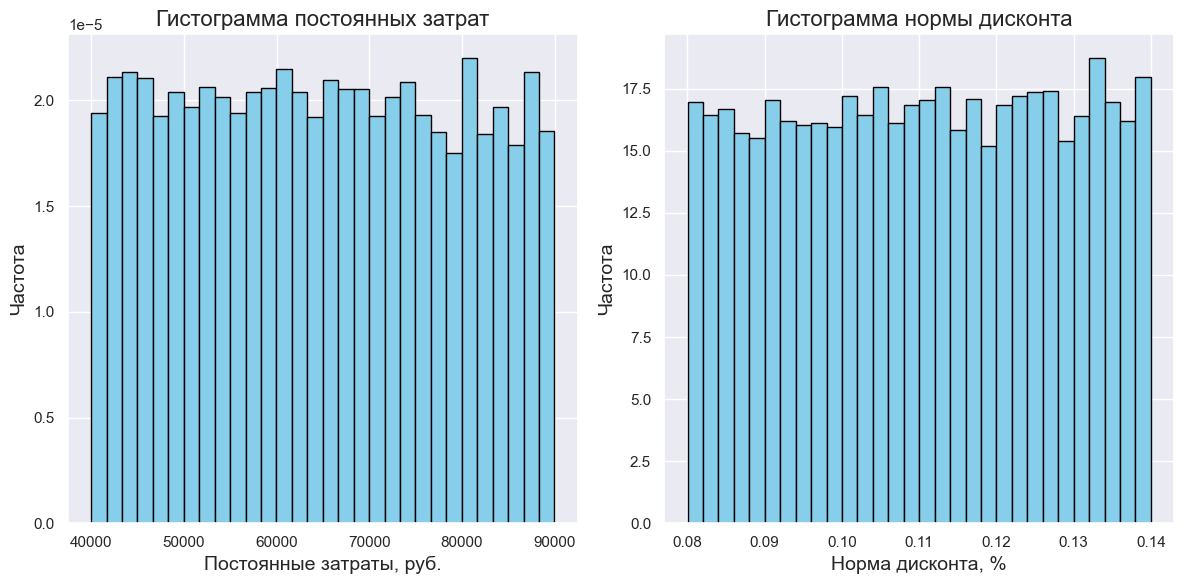

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(12, 6))

# График для постоянных затрат
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-й график
plt.hist(costs, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Постоянные затраты, руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма постоянных затрат', fontsize=16)
plt.grid(True)

# График для нормы дисконта
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2-й график
plt.hist(discounts, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Норма дисконта, %', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма нормы дисконта', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()


Сгенерируем список значений остаточной стоимости по экспоненциальному закону распределения

In [8]:
import numpy as np

np.random.seed(0) 

# Остаточная стоимость, руб.
scale = 1 / 0.00005  # Параметр масштаба для экспоненциального распределения равен обратному значению параметра распределения

residual_values = np.random.exponential(scale, num_samples)


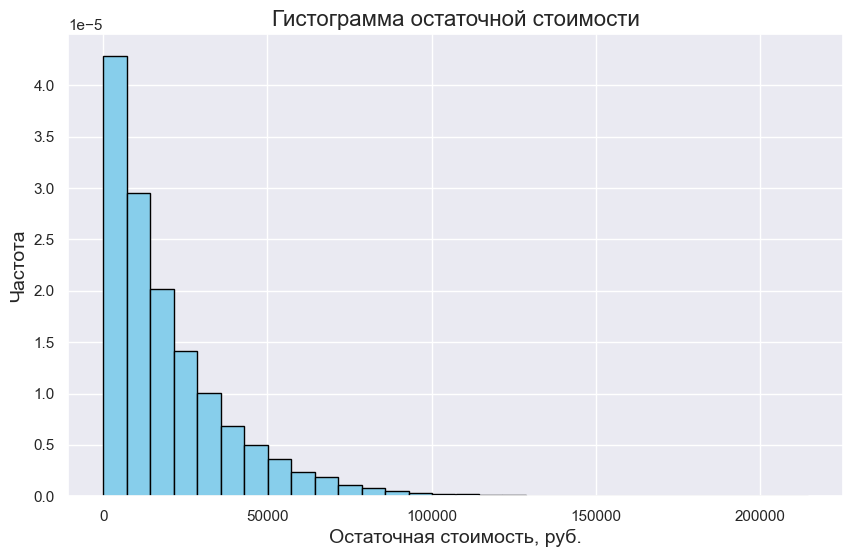

In [9]:
sns.set()

plt.figure(figsize=(10, 6))
plt.hist(residual_values, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Остаточная стоимость, руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма остаточной стоимости', fontsize=16)
plt.grid(True)
plt.show()


Сгенирируем список значений для цены продукции, по треугольному закону распределения

In [10]:
np.random.seed(42)

# Цена за штуку, руб.
left = 180
mode = 270
right = 310

num_samples = 10_000

prices = np.random.triangular(left, mode, right, num_samples)


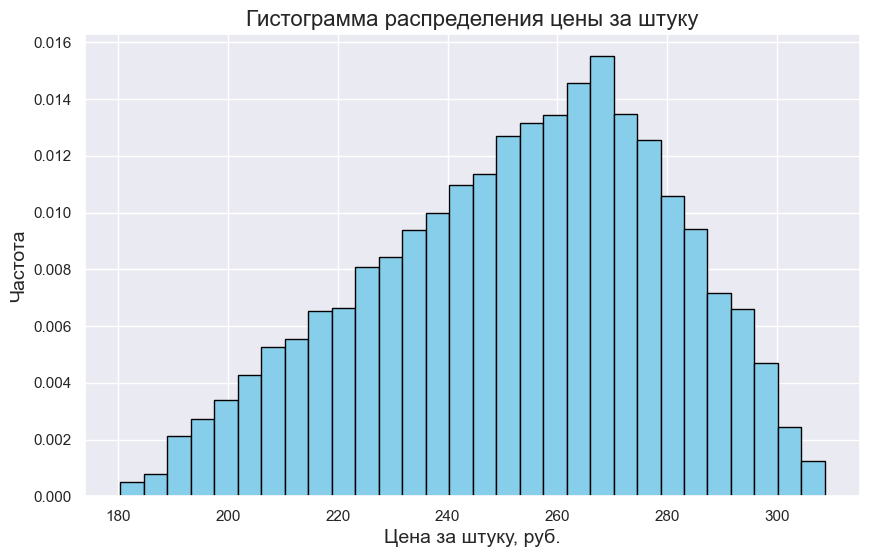

In [11]:
sns.set()

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Цена за штуку, руб.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма распределения цены за штуку', fontsize=16)
plt.grid(True)
plt.show()


Сгенирируем список значений для переменных затрат, по треугольному закону распределения

In [12]:
np.random.seed(42)

# Переменные затраты, руб./шт.
left = 140
mode = 180
right = 220
num_samples = 10_000

variable_costs = np.random.triangular(left, mode, right, num_samples)


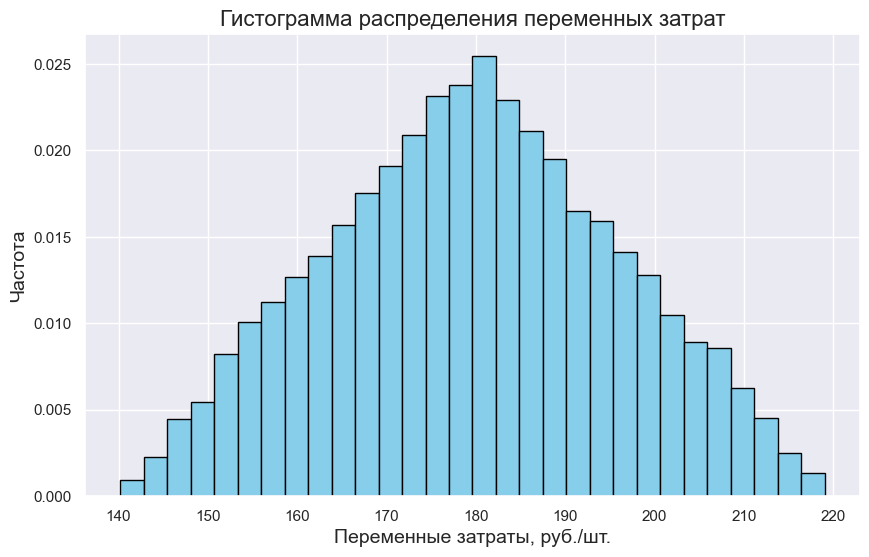

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(variable_costs, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Переменные затраты, руб./шт.', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма распределения переменных затрат', fontsize=16)
plt.grid(True)
plt.show()


Теперь по формуле сгенерирум список значений CFt (ежегодного дохода). numpy позволяет нам сделать это без явных циклов.

In [14]:
CFt = (1 - tax_rate) * (values * prices - variable_costs * values + amortization - costs)

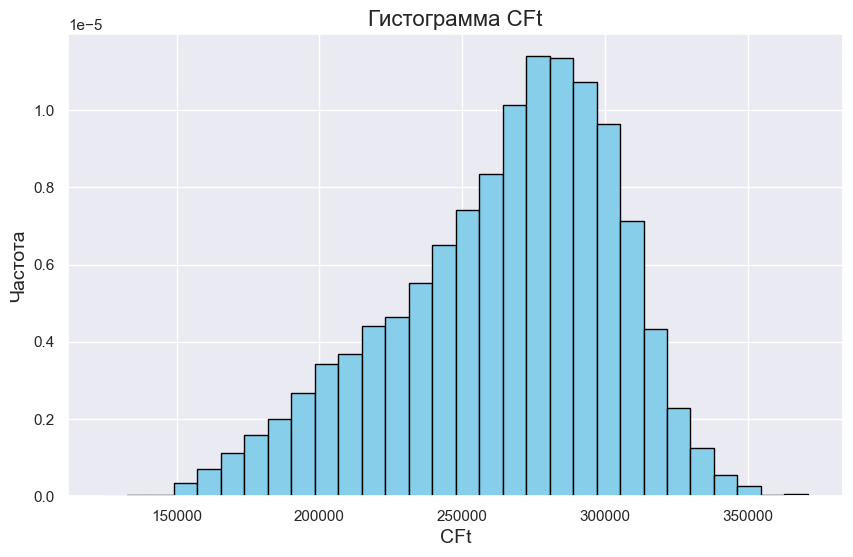

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(CFt, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('CFt', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма CFt', fontsize=16)
plt.grid(True)
plt.show()

NPV

In [16]:
NPV = CFt/(1 + discounts) + CFt/((1 + discounts)**2) + CFt/((1 + discounts)**3) + (CFt + residual_values)/((1 + discounts)**4) - initial_investment

In [17]:
NPV

array([361580.39019792, 469326.81205737, 494899.0744094 , ...,
       439399.19221925, 353251.23991878, 321508.12439173])

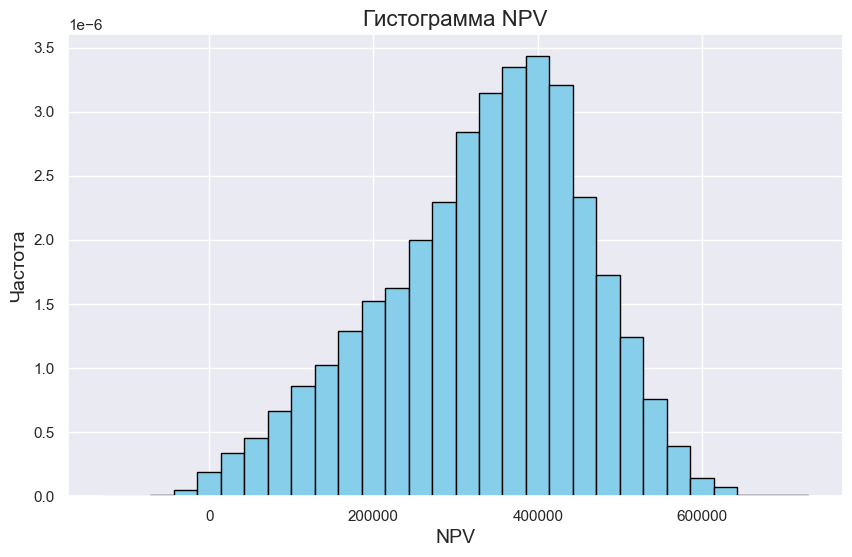

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(NPV, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('NPV', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма NPV', fontsize=16)
plt.grid(True)
plt.show()

PI

In [19]:
PI = (CFt/(1 + discounts) + CFt/((1 + discounts)**2) + CFt/((1 + discounts)**3) + (CFt + residual_values)/((1 + discounts)**4)) / initial_investment

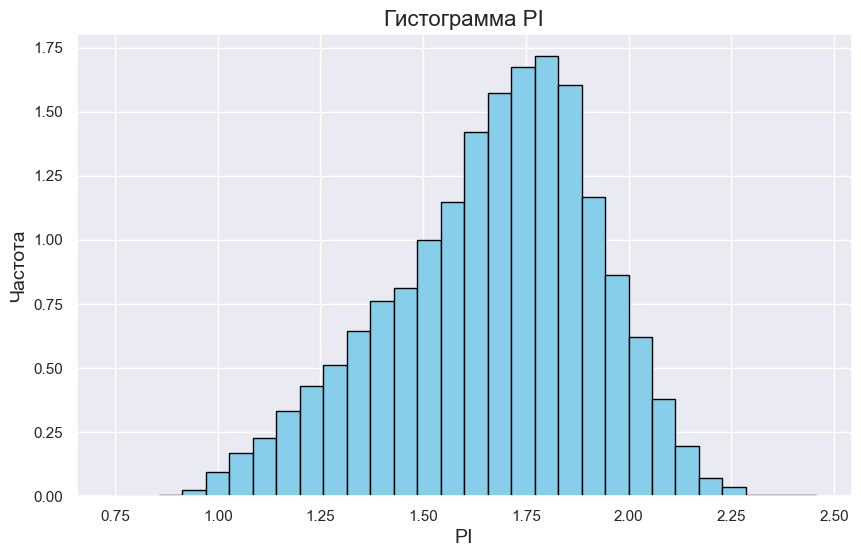

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(PI, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('PI', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма PI', fontsize=16)
plt.grid(True)
plt.show()

Для вывод статистики напишем функцию:

In [21]:
import numpy as np
from scipy import stats

def print_statistics(values):
    print('Среднее:', round(np.mean(values), 5))
    print('Стандартная ошибка:', round(stats.sem(values), 5))
    print('Медиана:', round(np.median(values), 5))
    print('Стандартное отклонение:', round(np.std(values), 5))
    print('Дисперсия выборки:', round(np.var(values), 5))
    print('Эксцесс:', round(stats.kurtosis(values), 5))
    print('Ассиметричность:', round(stats.skew(values), 5))
    print('Интервал:', round(np.ptp(values), 5))
    print('Минимум:', round(np.min(values), 5))
    print('Максимум:', round(np.max(values), 5))
    print('Сумма:', round(np.sum(values), 5))
    print('Счет:', len(values))



In [22]:
print('Статистические показатели характеристики "Ежегодный доход"')
print_statistics(CFt)

Статистические показатели характеристики "Ежегодный доход"
Среднее: 264429.07375
Стандартная ошибка: 388.45641
Медиана: 271097.38293
Стандартное отклонение: 38843.69916
Дисперсия выборки: 1508832964.126
Эксцесс: -0.20473
Ассиметричность: -0.54972
Интервал: 246717.25355
Минимум: 124324.72353
Максимум: 371041.97708
Сумма: 2644290737.52168
Счет: 10000


In [23]:
print('Статистические показатели характеристики "Чистая приведенная стоимость"')
print_statistics(NPV)

Статистические показатели характеристики "Чистая приведенная стоимость"
Среднее: 333937.07488
Стандартная ошибка: 1255.8447
Медиана: 350162.4047
Стандартное отклонение: 125578.19035
Дисперсия выборки: 15769881892.11678
Эксцесс: -0.21698
Ассиметричность: -0.42871
Интервал: 857576.87937
Минимум: -128934.45488
Максимум: 728642.42449
Сумма: 3339370748.83656
Счет: 10000


In [24]:
print('Статистические показатели характеристики "Норма доходности"')
print_statistics(PI)

Статистические показатели характеристики "Норма доходности"
Среднее: 1.66787
Стандартная ошибка: 0.00251
Медиана: 1.70032
Стандартное отклонение: 0.25116
Дисперсия выборки: 0.06308
Эксцесс: -0.21698
Ассиметричность: -0.42871
Интервал: 1.71515
Минимум: 0.74213
Максимум: 2.45728
Сумма: 16678.7415
Счет: 10000


In [25]:
import numpy_financial as npf


initial_investment_array = np.full(num_samples, initial_investment)

# Расчет IRR
cash_flows = np.column_stack((initial_investment_array * -1, CFt, CFt, CFt, CFt + residual_values))  # Скорректированные денежные потоки с учетом начальных инвестиций и остаточных значений
IRR = [npf.irr(cf) for cf in cash_flows]  # Преобразование IRR в проценты

print("IRR:", IRR)

IRR: [0.40409347492158054, 0.48082373698175496, 0.48616070619275, 0.5082797386584799, 0.2809855574120812, 0.285136986634972, 0.2642061971697587, 0.5120499713194129, 0.440577975169383, 0.47727952759208314, 0.162412182804494, 0.46819634325794324, 0.4767391736521138, 0.26677254819465746, 0.23708283358162707, 0.28028900914302324, 0.31475129294621795, 0.44821525648056104, 0.3711882532562776, 0.3110056822662639, 0.5253772797170584, 0.28056702042464443, 0.35627787918814535, 0.3312058429951963, 0.3829924007986696, 0.467519769692474, 0.2674852031249486, 0.4549805941827021, 0.4168474598519152, 0.19325642456300507, 0.41629098540010423, 0.3680867959514609, 0.22243098226010805, 0.4353785455532724, 0.5219255446725419, 0.4097675230783102, 0.36887261000954363, 0.1891167041787143, 0.40998188025114723, 0.4155890009288361, 0.29168915299001363, 0.4266624906898968, 0.19010292636895287, 0.4576319399747051, 0.2887311774066057, 0.42308905126746366, 0.34063742866671043, 0.46730747074137113, 0.44568821109975265

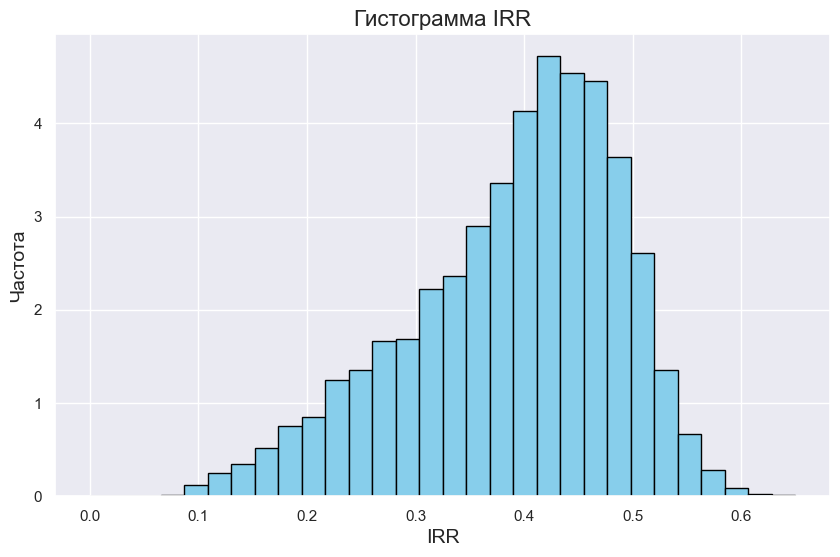

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(IRR, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('IRR', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма IRR', fontsize=16)
plt.grid(True)
plt.show()

In [27]:
print('Статистические показатели характеристики "Внутренняя норма доходности"')
print_statistics(IRR)

Статистические показатели характеристики "Внутренняя норма доходности"
Среднее: 0.39028
Стандартная ошибка: 0.00097
Медиана: 0.40815
Стандартное отклонение: 0.09729
Дисперсия выборки: 0.00947
Эксцесс: -0.03852
Ассиметричность: -0.64219
Интервал: 0.64887
Минимум: 0.00065
Максимум: 0.64951
Сумма: 3902.82473
Счет: 10000


## Часть Б.

In [28]:
T = 0.20
i = 0.08

P1 = np.random.uniform(8500, 10500, num_samples) 
P2 = np.random.uniform(9000, 11000, num_samples) 
P3 = np.random.uniform(9500, 11500, num_samples) 
Q1 = np.random.normal(1500, 300, num_samples) 
Q2 = np.random.normal(1600, 325, num_samples) 
Q3 = np.random.normal(1700, 350, num_samples) 
X = np.random.normal(55, 5, num_samples) / 100 
Y = np.random.normal(15, 2, num_samples) / 100

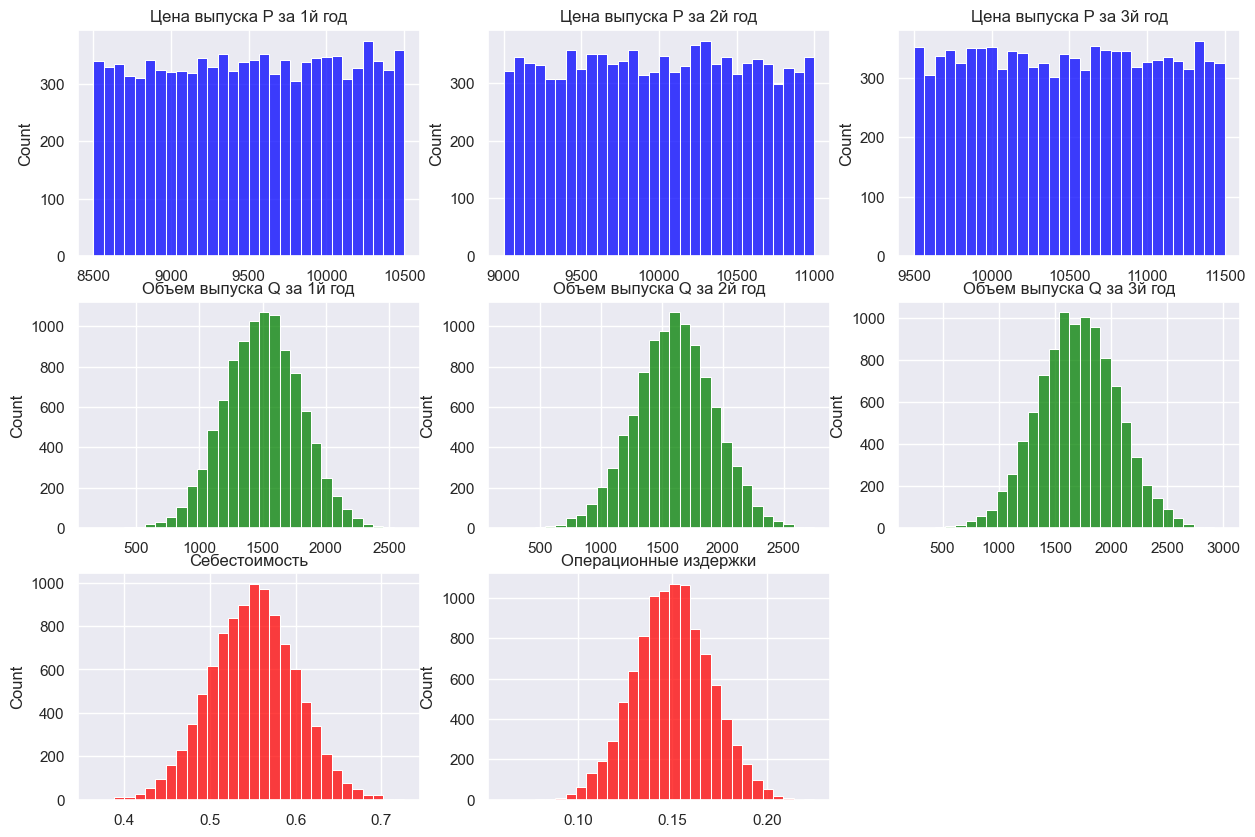

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Создание фигуры и осей
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# P1 - P3
sns.histplot(P1, bins=30, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Цена выпуска P за 1й год')
sns.histplot(P2, bins=30, color='blue', ax=axs[0, 1])
axs[0, 1].set_title('Цена выпуска P за 2й год')
sns.histplot(P3, bins=30, color='blue', ax=axs[0, 2])
axs[0, 2].set_title('Цена выпуска P за 3й год')

# Q1 - Q3
sns.histplot(Q1, bins=30, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Объем выпуска Q за 1й год')
sns.histplot(Q2, bins=30, color='green', ax=axs[1, 1])
axs[1, 1].set_title('Объем выпуска Q за 2й год')
sns.histplot(Q3, bins=30, color='green', ax=axs[1, 2])
axs[1, 2].set_title('Объем выпуска Q за 3й год')

# X и Y
sns.histplot(X, bins=30, color='red', ax=axs[2, 0])
axs[2, 0].set_title('Себестоимость')
sns.histplot(Y, bins=30, color='red', ax=axs[2, 1])
axs[2, 1].set_title('Операционные издержки')

# Удаление пустого графика
fig.delaxes(axs[2][2])

# Показать график
plt.show()

In [30]:
def CFt(T, Q, P, X, Y): 
    return (1 - T) * (Q * P - Q * (X + Y))

CF1 = CFt(T, Q1, P1, X, Y)
CF2 = CFt(T, Q2, P2, X, Y)
CF3 = CFt(T, Q3, P3, X, Y)
CF = CF1 + CF2 + CF3

In [31]:
NPV = sum(cf / ((1 + i) ** (t + 1)) for t, cf in enumerate([CF1, CF2, CF3]))

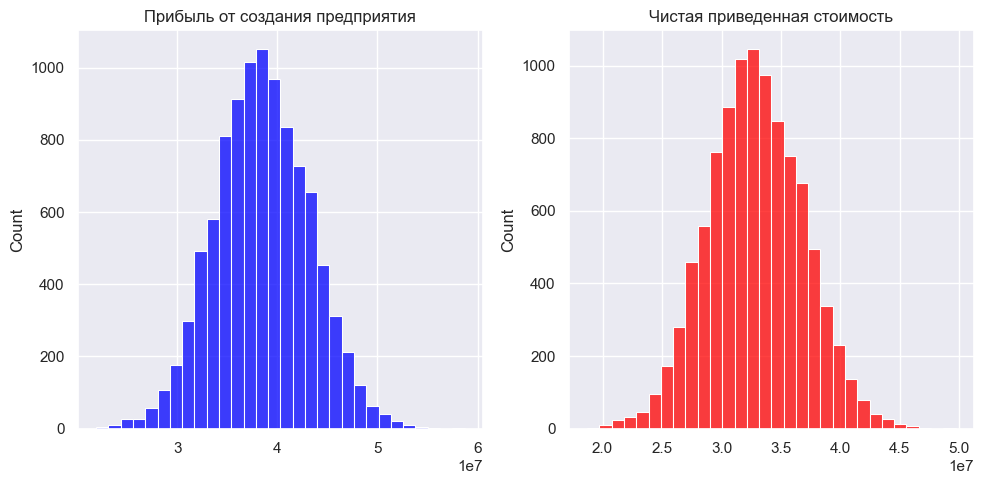

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Гистограмма CF
sns.histplot(CF, bins=30, color='blue', ax=axs[0])
axs[0].set_title('Прибыль от создания предприятия')

# Гистограмма NPV
sns.histplot(NPV, bins=30, color='red', ax=axs[1])
axs[1].set_title('Чистая приведенная стоимость')

# Показать график
plt.tight_layout()
plt.show()

In [33]:
print('Статистические показатели характеристики "CFt"')
print_statistics(CF)

Статистические показатели характеристики "CFt"
Среднее: 38488716.05392
Стандартная ошибка: 47128.81407
Медиана: 38389475.91036
Стандартное отклонение: 4712645.75748
Дисперсия выборки: 22209030035514.133
Эксцесс: -0.00302
Ассиметричность: 0.04727
Интервал: 36786685.14112
Минимум: 21908674.67125
Максимум: 58695359.81236
Сумма: 384887160539.16895
Счет: 10000


In [34]:
print('Статистические показатели характеристики "NPV"')
print_statistics(NPV)

Статистические показатели характеристики "NPV"
Среднее: 32871759.40284
Стандартная ошибка: 40043.73585
Медиана: 32796316.3846
Стандартное отклонение: 4004173.36127
Дисперсия выборки: 16033404307079.033
Эксцесс: -0.00061
Ассиметричность: 0.04706
Интервал: 30986647.32885
Минимум: 18699616.08827
Максимум: 49686263.41713
Сумма: 328717594028.3551
Счет: 10000


## Б2

In [36]:
T = 0.32 
i = 0.10 
I0 = 3_400_000
P1 = np.random.triangular(5.90, 6.00, 6.10, num_samples) 
P2 = np.random.triangular(5.95, 6.05, 6.15, num_samples) 
P3 = np.random.triangular(6.00, 6.10, 6.20, num_samples) 
Q1 = np.random.normal(802000, 25000, num_samples) 
Q2 = np.random.normal(967000, 30000, num_samples) 
Q3 = np.random.normal(1132000, 25000, num_samples)
X = np.random.triangular(50, 55, 65, num_samples) / 100 
Y = np.random.normal(15, 2, num_samples) / 100

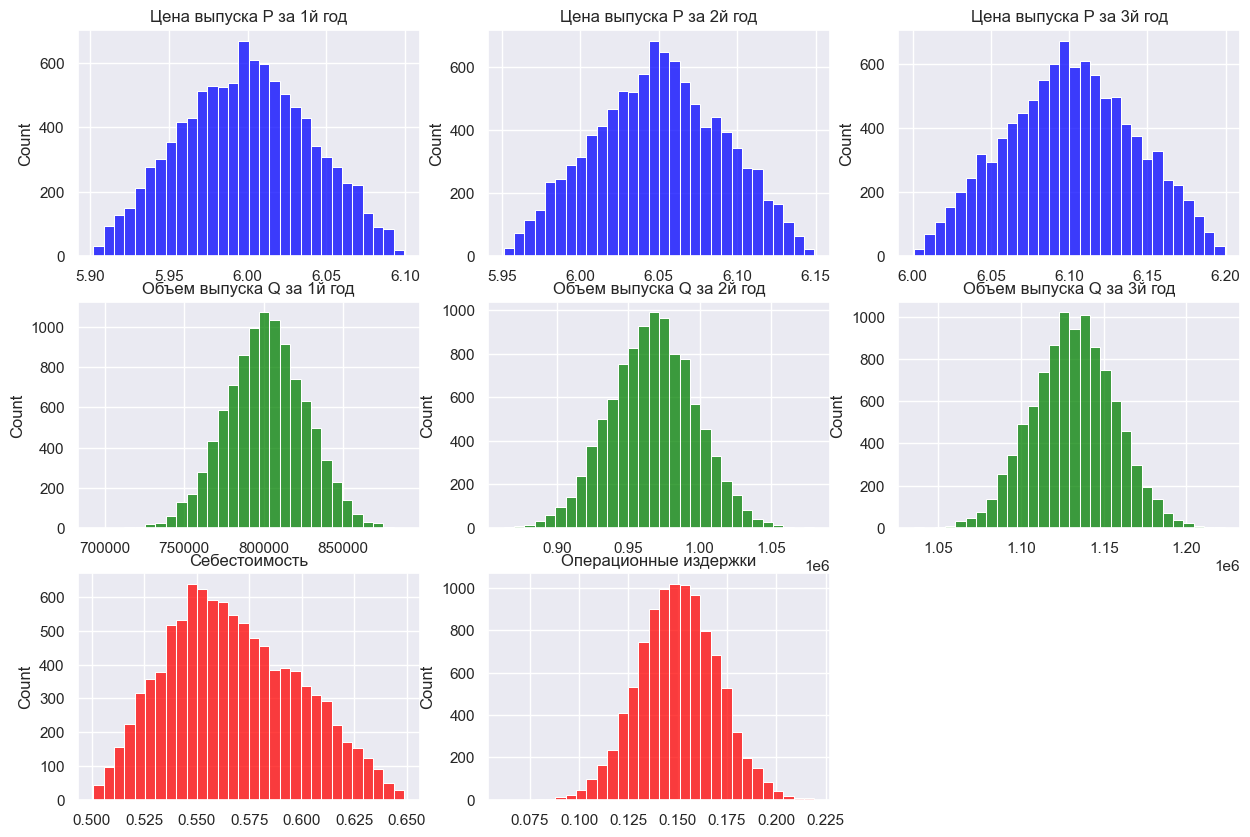

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Создание фигуры и осей
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# P1 - P3
sns.histplot(P1, bins=30, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Цена выпуска P за 1й год')
sns.histplot(P2, bins=30, color='blue', ax=axs[0, 1])
axs[0, 1].set_title('Цена выпуска P за 2й год')
sns.histplot(P3, bins=30, color='blue', ax=axs[0, 2])
axs[0, 2].set_title('Цена выпуска P за 3й год')

# Q1 - Q3
sns.histplot(Q1, bins=30, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Объем выпуска Q за 1й год')
sns.histplot(Q2, bins=30, color='green', ax=axs[1, 1])
axs[1, 1].set_title('Объем выпуска Q за 2й год')
sns.histplot(Q3, bins=30, color='green', ax=axs[1, 2])
axs[1, 2].set_title('Объем выпуска Q за 3й год')

# X и Y
sns.histplot(X, bins=30, color='red', ax=axs[2, 0])
axs[2, 0].set_title('Себестоимость')
sns.histplot(Y, bins=30, color='red', ax=axs[2, 1])
axs[2, 1].set_title('Операционные издержки')

# Удаление пустого графика
fig.delaxes(axs[2][2])

# Показать график
plt.show()

In [38]:
CF1 = CFt(T, Q1, P1, X, Y)
CF2 = CFt(T, Q2, P2, X, Y)
CF3 = CFt(T, Q3, P3, X, Y)
CF = CF1 + CF2 + CF3

In [47]:
NPV = sum(cf / ((1 + i) ** (t + 1)) for t, cf in enumerate([CF1, CF2, CF3])) - I0

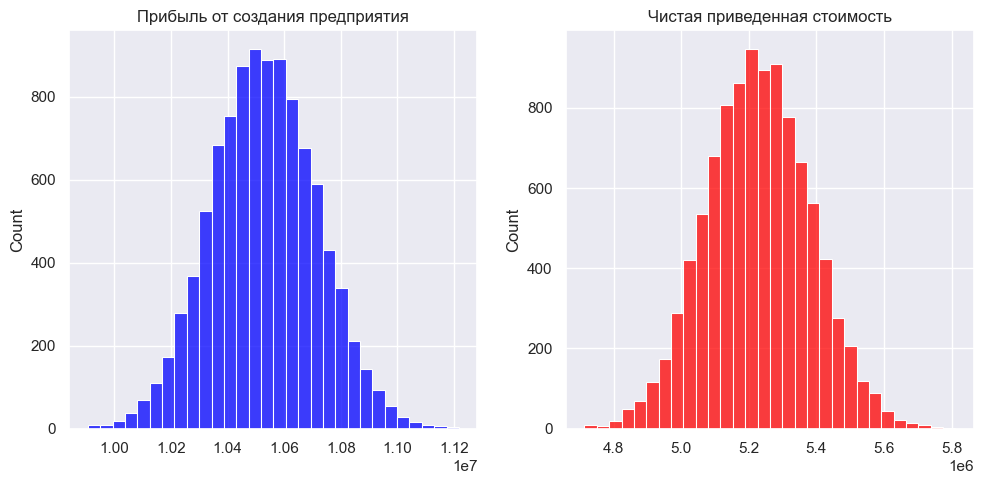

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Гистограмма CF
sns.histplot(CF, bins=30, color='blue', ax=axs[0])
axs[0].set_title('Прибыль от создания предприятия')

# Гистограмма NPV
sns.histplot(NPV, bins=30, color='red', ax=axs[1])
axs[1].set_title('Чистая приведенная стоимость')

# Показать график
plt.tight_layout()
plt.show()

In [52]:
PI = (CF1/(1 + i) + CF2/((1 + i)**2) + CF3/((1 + i)**3)) / I0

In [53]:
PI

array([2.59730748, 2.53719911, 2.54973176, ..., 2.51656545, 2.42093841,
       2.5653357 ])

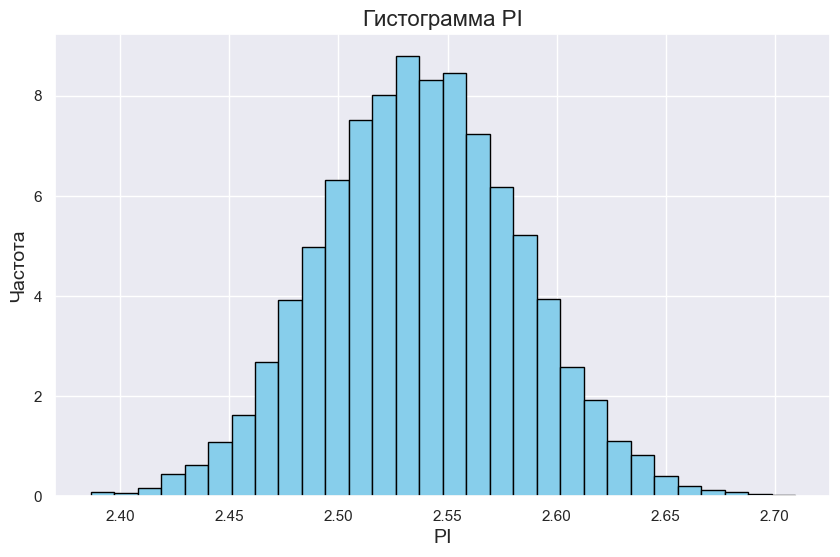

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(PI, bins=30, density=True, color='skyblue', edgecolor='black')
plt.xlabel('PI', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма PI', fontsize=16)
plt.grid(True)
plt.show()

In [56]:
print('Статистические показатели характеристики "Ежегодный доход"')
print_statistics(CF)

Статистические показатели характеристики "Ежегодный доход"
Среднее: 10528839.27294
Стандартная ошибка: 1863.59736
Медиана: 10526950.09344
Стандартное отклонение: 186350.41779
Дисперсия выборки: 34726478211.66086
Эксцесс: -0.04258
Ассиметричность: 0.05019
Интервал: 1310502.06019
Минимум: 9906580.79087
Максимум: 11217082.85106
Сумма: 105288392729.35455
Счет: 10000


In [57]:
print('Статистические показатели характеристики "Чистая приведенная стоимость"')
print_statistics(NPV)

Статистические показатели характеристики "Чистая приведенная стоимость"
Среднее: 5228208.08214
Стандартная ошибка: 1541.01276
Медиана: 5226817.72894
Стандартное отклонение: 154093.57083
Дисперсия выборки: 23744828572.62478
Эксцесс: -0.0415
Ассиметричность: 0.04935
Интервал: 1097667.90941
Минимум: 4713884.34809
Максимум: 5811552.2575
Сумма: 52282080821.44623
Счет: 10000


In [55]:
print('Статистические показатели характеристики "Норма доходности"')
print_statistics(PI)

Статистические показатели характеристики "Норма доходности"
Среднее: 2.53771
Стандартная ошибка: 0.00045
Медиана: 2.5373
Стандартное отклонение: 0.04532
Дисперсия выборки: 0.00205
Эксцесс: -0.0415
Ассиметричность: 0.04935
Интервал: 0.32284
Минимум: 2.38644
Максимум: 2.70928
Сумма: 25377.08259
Счет: 10000
